In [ ]:
!pip install black


In [ ]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

# Your code here


<ipython-input-13-d77f511f9611>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style="seaborn")


In [ ]:
df = pd.read_csv("MSFT.csv")

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-08,228.699997,231.649994,225.839996,228.869995,226.680084,28192500
1,2022-11-09,227.369995,228.630005,224.330002,224.509995,222.361801,27852900
2,2022-11-10,235.429993,243.330002,235.000000,242.979996,240.655060,46268000
3,2022-11-11,242.990005,247.990005,241.929993,247.110001,244.745560,34620200
4,2022-11-14,241.990005,243.910004,239.210007,241.550003,239.238754,31123300


In [ ]:
df = df[["Close"]].copy()

In [ ]:
df.head(5)

,Close
0,228.869995
1,224.509995
2,242.979996
3,247.110001
4,241.550003


In [ ]:
df.describe()

,Close
count,251.000000
mean,295.197690
std,39.335556
min,222.309998
25%,253.809998
50%,309.459991
75%,330.109985
max,360.529999


An ARIMA model is characterized by 3 terms (p, d, q):

• p is the order of the AR term

• d is the number of differencing required to make the time series stationary

• q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

ADF test

We'll use the Augmented Dickey Fuller (AD) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [ ]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print (f"ADF Statistic: {result [0]}")
print (f"p-value: {result[1]}")

ADF Statistic: -0.5985537482549932
p-value: 0.8713084857466113


thererfore not stationary

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

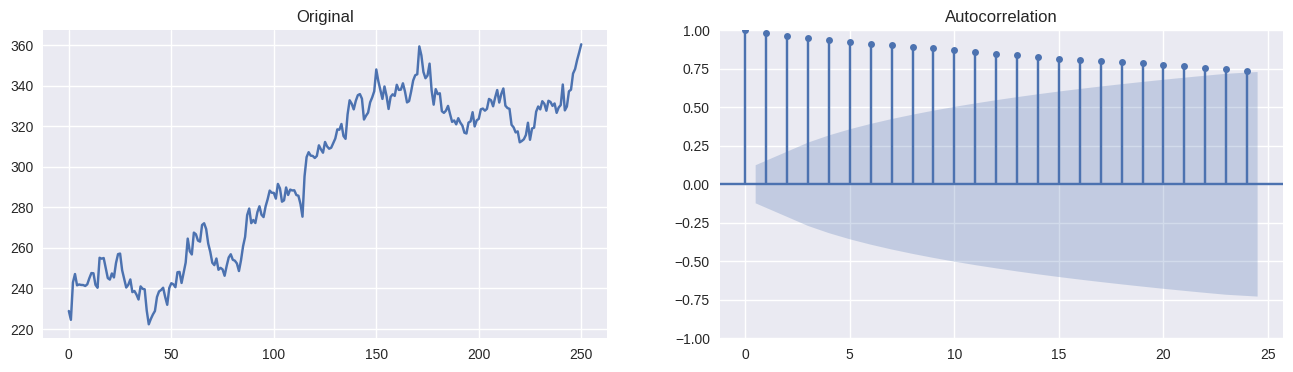

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
# add; at the end of the plot function so that the plot is not duplicated
plot_acf (df.Close, ax=ax2);

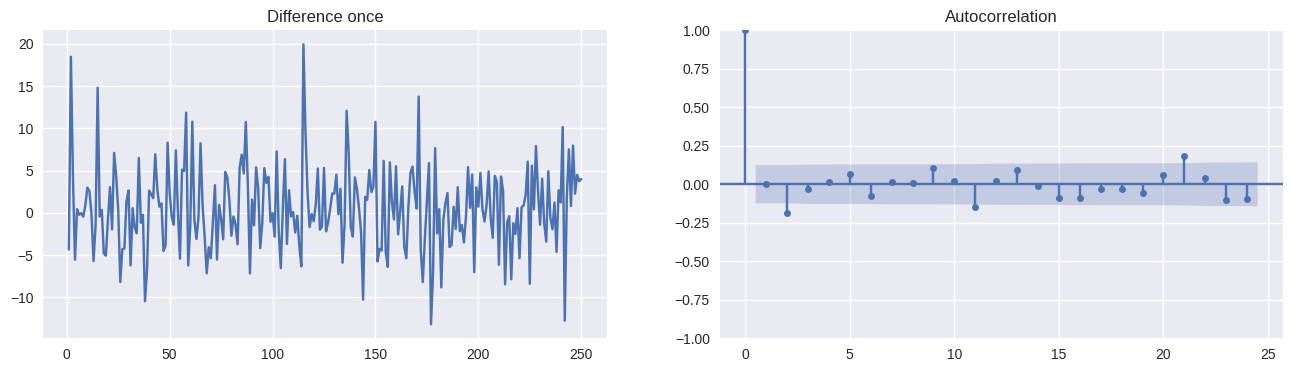

In [ ]:
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots (1, 2, figsize= (16, 4))
ax1.plot (diff)
ax1.set_title ("Difference once")
plot_acf (diff, ax=ax2);

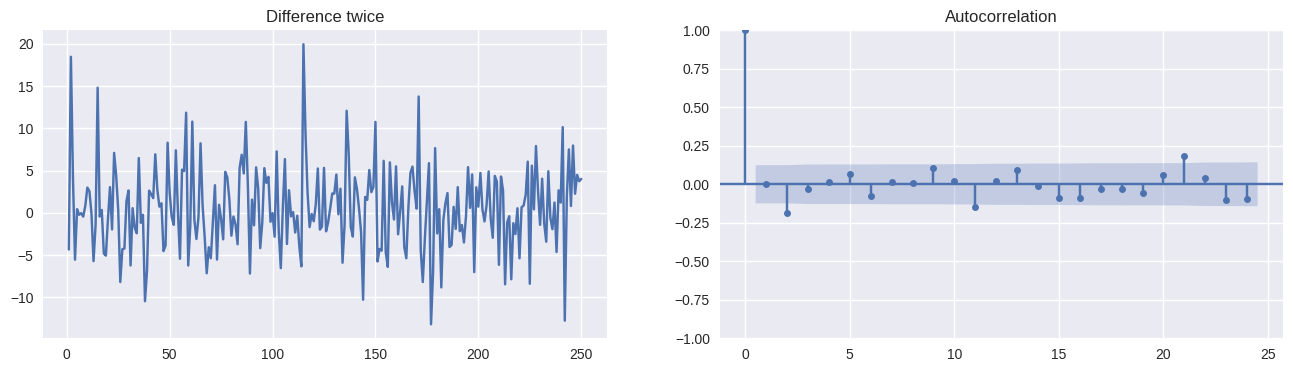

In [ ]:
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots (1, 2, figsize= (16, 4))
ax1.plot (diff)
ax1.set_title ("Difference twice")
plot_acf (diff, ax=ax2);

we can also do it with the help of a library

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df.Close, test="adf")

1

p is the order of the Auto Regressive (AR) term.

It refers to the number of lags to be used as predictors.
We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

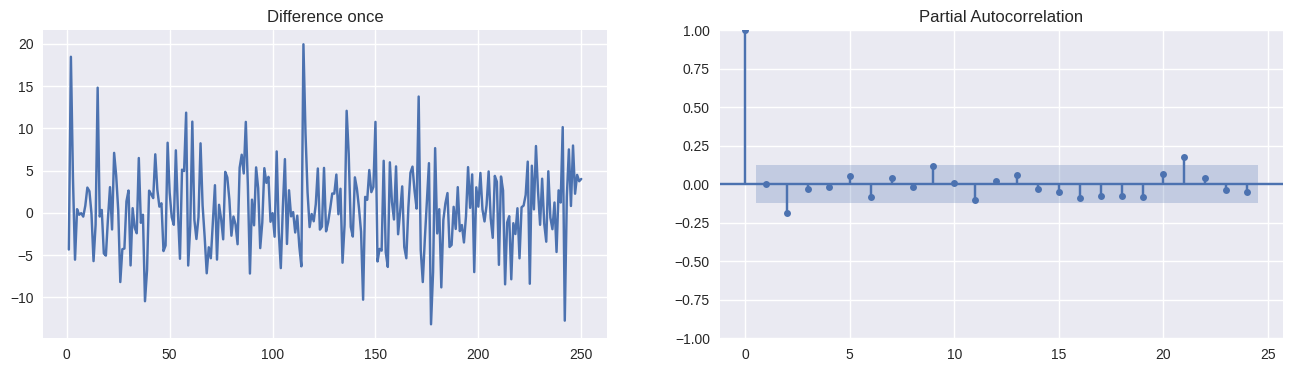

In [ ]:
diff = df.Close.diff().dropna( )
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 4))
ax1.plot(diff)
ax1.set_title( "Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

q is the order of the Moving Average (MA) term.

It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.


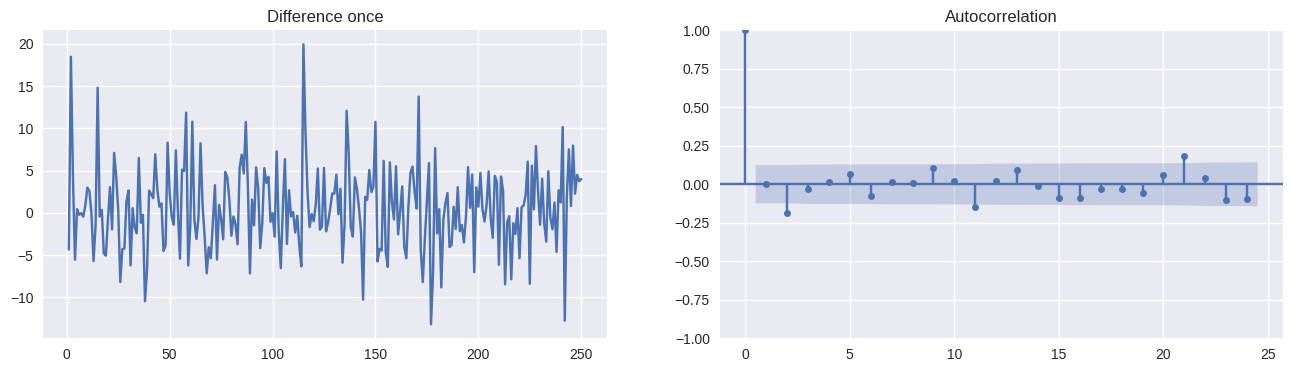

In [ ]:
diff = df.Close.diff() .dropna ( )
fig, (ax1, ax2) = plt.subplots (1, 2, figsize= (16, 4))
ax1.plot (diff)
ax1.set_title ("Difference once")
ax2.set_ylim(0, 1)
plot_acf (diff, ax=ax2);

##FITTING ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df.Close, order=(2, 1, 9))
result = model.fit()


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 1, 9)   Log Likelihood                -744.371
Date:                Wed, 08 Nov 2023   AIC                           1512.743
Time:                        19:14:25   BIC                           1555.000
Sample:                             0   HQIC                          1529.750
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0842      0.119      0.707      0.480      -0.149       0.318
ar.L2         -0.8119      0.104     -7.819      0.000      -1.015      -0.608
ma.L1         -0.0689      0.143     -0.483      0.6

(array([0.0403552 , 0.00082358, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00016472]),
 array([-13.00607082,  11.18153577,  35.36914235,  59.55674893,
         83.74435551, 107.93196209, 132.11956867, 156.30717526,
        180.49478184, 204.68238842, 228.869995  ]),
 <BarContainer object of 10 artists>)

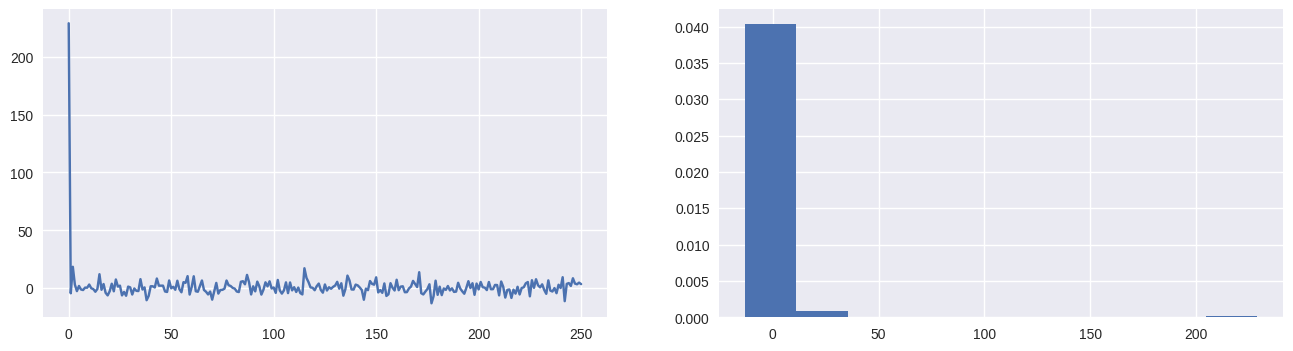

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt. subplots (1, 2, figsize= (16, 4))
ax1.plot (residuals)
ax2.hist (residuals, density=True)

TypeError: ignored